In [28]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 

In [47]:
# I establish a connection to the SQLite database 'netflix_data.db' for additional operations.
conn = sqlite3.connect('netflix_data.db')

# I form a query to retrieve all the data from the table 'Netflix_Shows' again.
query = "SELECT * FROM Netflix_Shows;"

# I load the queried data into a fresh Pandas DataFrame, assigning it a different variable name 'data'.
data = pd.read_sql(query, conn)

# I display the contents of the 'data' DataFrame.
data


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,None,None,None,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [48]:
# I calculate the number of missing values in the 'description' column.
missing_values_description = data['description'].isnull().sum()
print("Missing Values in 'description' column:", missing_values_description)

# I fill the missing values in the 'description' column with 'No Description Available'.
data['description'].fillna('No Description Available', inplace=True)

# I print the first few rows of the updated DataFrame.
print(data.head())


Missing Values in 'description' column: 0
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water             None   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans             None   
4      s5  TV Show           Kota Factory             None   

                                                cast        country  \
0                                               None  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           None   
3                                               None           None   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  

In [25]:
# I verify that missing values in the 'description' column have been handled.
updated_missing_values_description = data['description'].isnull().sum()
print("Updated Missing Values in 'description' column:", updated_missing_values_description)

# I display the first few rows of the updated DataFrame.
print(data.head())


Updated Missing Values in 'description' column: 0
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water             None   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans             None   
4      s5  TV Show           Kota Factory             None   

                                                cast        country  \
0                                               None  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           None   
3                                               None           None   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021 

In [43]:
# I group the data by 'release_year' and count the number of titles per year.
titles_per_year = data.groupby('release_year').size()

print(titles_per_year)


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Length: 74, dtype: int64


In [44]:
# I'm creating a bar chart to display the prevalence of genres on Netflix.
# The chart will illustrate the count of titles per genre.

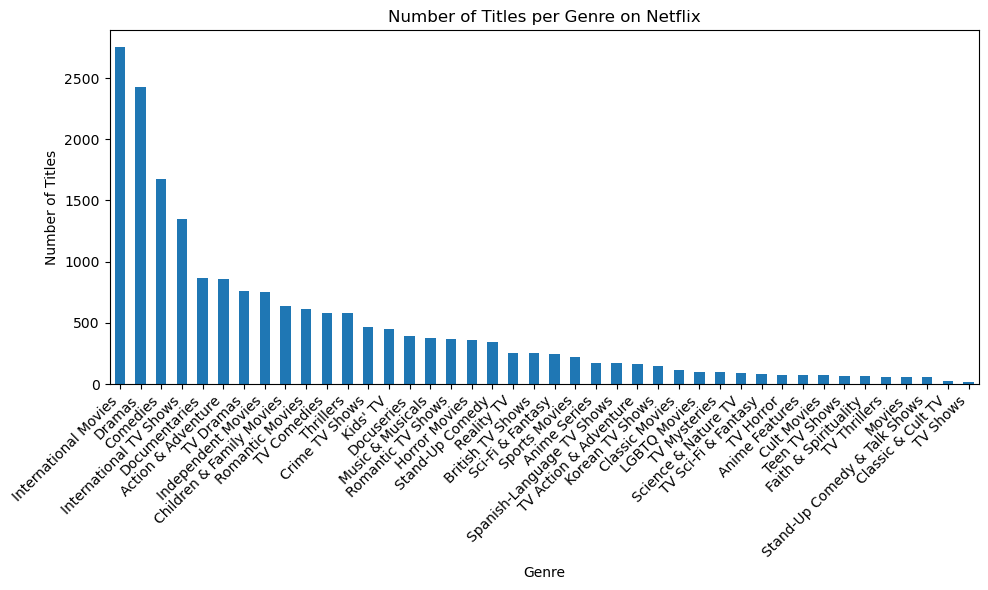

In [45]:
# I'm counting the occurrences of each genre in the 'listed_in' column.
genre_counts = data['listed_in'].str.split(', ').explode().value_counts()

# I'm creating a bar chart to visualize the number of titles per genre on Netflix.
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Titles per Genre on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# I'm exploring the distribution of TV shows vs. movies on Netflix.
# My goal is to represent the proportion of TV shows and movies using a pie chart.
# Code for generating the pie chart to display the distribution of TV shows and movies will follow...

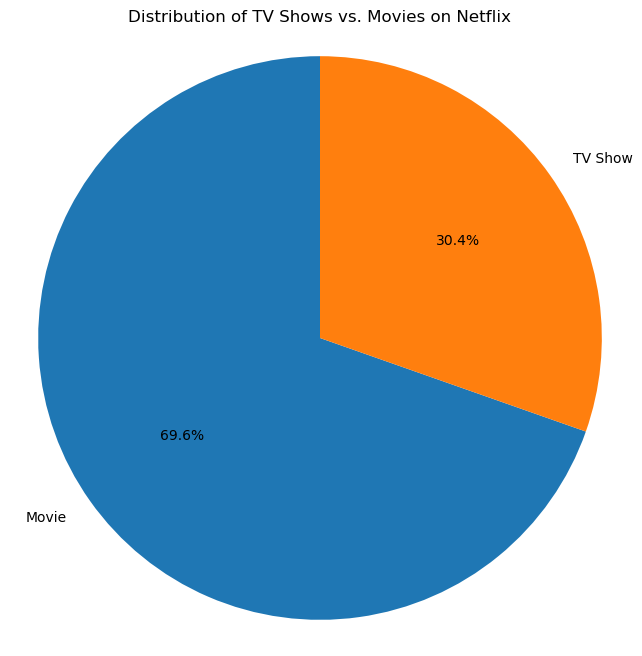

In [34]:
# I'm counting occurrences of TV shows and movies in the 'type' column.
type_counts = data['type'].value_counts()

# I'm plotting a pie chart to illustrate the distribution of TV shows and movies on Netflix.
# Adjusting the start angle to 90 degrees for a modified perspective.
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TV Shows vs. Movies on Netflix')
plt.axis('equal')
plt.show()

In [ ]:
# I'm exploring how the number of titles released each year has changed over time.
# To illustrate this, I'll create a line plot displaying the count of titles per year based on the 'release_year'.

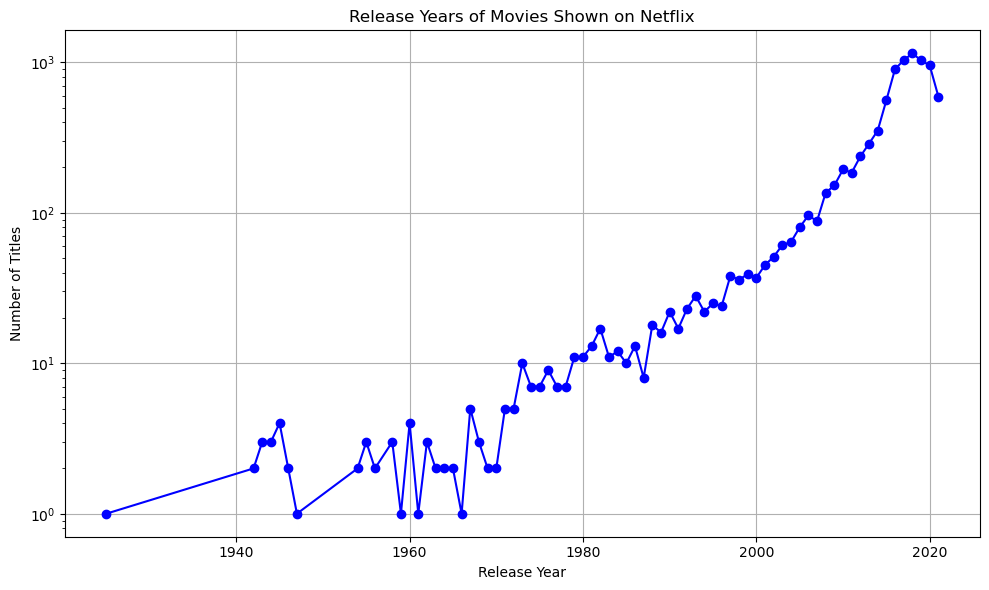

In [36]:
# I'm grouping the data by release year and calculating the number of titles per year.

titles_per_year = data.groupby('release_year').size()

# I'm creating a line chart to visualize the distribution of titles over release years on a logarithmic scale for the y-axis.
plt.figure(figsize=(10, 6))
plt.semilogy(titles_per_year.index, titles_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Release Years of Movies Shown on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# I'm exploring the variation in title lengths between movies and TV shows offered on Netflix.

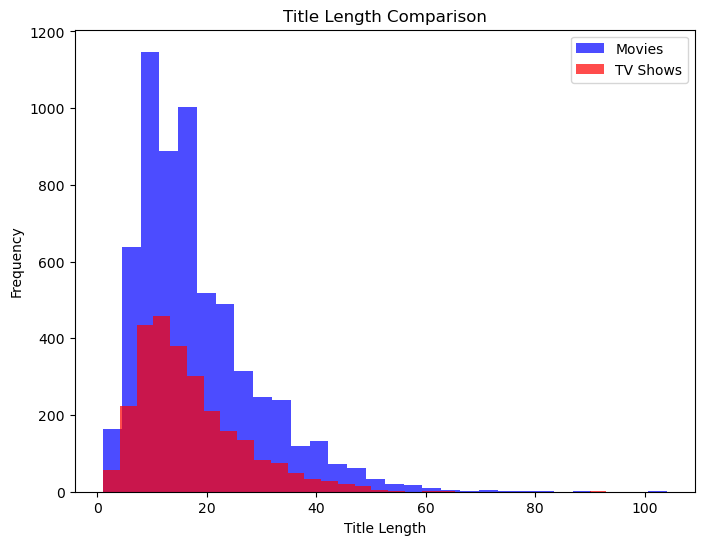

In [16]:
# I separate the dataset into two groups: movies and TV shows available on Netflix.

movies = data[data['type'] == 'Movie'].copy()
tv_shows = data[data['type'] == 'TV Show'].copy()

# I calculate the lengths of titles for both movies and TV shows.
movies.loc[:, 'title_length'] = movies['title'].str.len()
tv_shows.loc[:, 'title_length'] = tv_shows['title'].str.len()

# Next, I visualize the comparison of title lengths between movies and TV shows using a histogram.
plt.figure(figsize=(8, 6))
plt.hist(movies['title_length'], bins=30, alpha=0.7, color='blue', label='Movies')
plt.hist(tv_shows['title_length'], bins=30, alpha=0.7, color='red', label='TV Shows')
plt.title('Title Length Comparison')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()
